#### -importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#### -Reading data

In [2]:
train_data= pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head() #train data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
target = train_data.y #assigning target variable
train_data = train_data.drop('y', axis=1) #features

print(train_data.shape)
print(target.shape)

(4209, 377)
(4209,)


In [5]:
target.isnull().sum() #checking missing values of target variable

0

In [6]:
test_data.head() #test data

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
train_data.shape

(4209, 377)

### 1. Removing the columns with variance is equal to zero

In [8]:
var_dt = train_data.var() #variance of columns
var_dt

ID      5.941936e+06
X10     1.313092e-02
X11     0.000000e+00
X12     6.945713e-02
X13     5.462335e-02
            ...     
X380    8.014579e-03
X382    7.546747e-03
X383    1.660732e-03
X384    4.750593e-04
X385    1.423823e-03
Length: 369, dtype: float64

In [9]:
var_dt[var_dt == 0].index #columns with variance equal to zero

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

In [10]:
train_data = train_data.drop(['ID','X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293','X297', 'X330', 'X347'], axis=1)
train_data.shape

(4209, 364)

In [11]:
test_data = test_data.drop(['ID','X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293','X297', 'X330', 'X347'], axis=1)
test_data.shape

(4209, 364)

### 2. Checking for null and unique values for test and train sets.

In [12]:
print(list(train_data.isnull().sum())) #missing values of train data

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [13]:
print(list(test_data.isnull().sum())) #missing values of test data

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [14]:
print(len(train_data.X0.unique())) #no of unique values for every column of train_data before analysis
print(len(train_data.X1.unique()))
print(len(train_data.X2.unique()))
print(len(train_data.X3.unique()))
print(len(train_data.X4.unique()))
print(len(train_data.X5.unique()))
print(len(train_data.X6.unique()))
print(len(train_data.X8.unique()))

47
27
44
7
4
29
12
25


In [15]:
print(len(test_data.X0.unique())) #no of unique values for every column of test_data before analysis
print(len(test_data.X1.unique()))
print(len(test_data.X2.unique()))
print(len(test_data.X3.unique()))
print(len(test_data.X4.unique()))
print(len(test_data.X5.unique()))
print(len(test_data.X6.unique()))
print(len(test_data.X8.unique()))

49
27
45
7
4
32
12
25


In [16]:
# cheching different values for same column X0 in train and test data.
set_a=set(test_data.X0.drop_duplicates())
set_b=set(train_data.X0.drop_duplicates())
print(set_b-set_a) #values in train but not in test
print(set_a-set_b) #values in test but not in train

{'aa', 'q', 'ab', 'ac'}
{'ae', 'av', 'bb', 'an', 'p', 'ag'}


In [17]:
set_a == set_b

False

In [18]:
test_data['X0'].replace({"av":"q","p":"ac","ae":"aa","ag":"ab"},inplace=True)

In [19]:
test_data.drop(test_data.index[test_data['X0'] == 'an'], inplace=True)
test_data.drop(test_data.index[test_data['X0'] == 'bb'], inplace=True)
set_a == set_b

False

In [20]:
# cheching different values for same column X1 in train and test data.
set_a=set(test_data.X1.drop_duplicates())
set_b=set(train_data.X1.drop_duplicates())
print(set_b-set_a)#values in train but not in test
print(set_a-set_b)#values in test but not in train
set_a ==set_b

set()
set()


True

In [21]:
# cheching different values for same column X2 in train and test data.
set_a=set(test_data.X2.drop_duplicates())
set_b=set(train_data.X2.drop_duplicates())
print(set_b-set_a)#values in train but not in test
print(set_a-set_b)#values in test but not in train
set_a == set_b

{'l', 'av', 'o', 'c', 'aa', 'ar'}
{'ad', 'aj', 'u', 'ax', 'ab', 'w'}


False

In [22]:
test_data['X2'].replace({"u":"aa","w":"l","ab":"o","aj":"c","ad":"ar"},inplace=True)
train_data['X2'].replace({"av":"aa"},inplace=True)

In [23]:
test_data.drop(test_data.index[test_data['X2'] == 'ax'], inplace=True)

In [24]:
# cheching different values for same column X3 in train and test data.
set_a=set(test_data.X3.drop_duplicates())
set_b=set(train_data.X3.drop_duplicates())
print(set_b-set_a)#values in train but not in test
print(set_a-set_b)#values in test but not in train
set_a ==set_b

set()
set()


True

In [25]:
# cheching different values for same column X4 in train and test data.
set_a=set(test_data.X4.drop_duplicates())
set_b=set(train_data.X4.drop_duplicates())
print(set_b-set_a)#values in train but not in test
print(set_a-set_b)#values in test but not in train
set_a ==set_b

set()
set()


True

In [26]:
# cheching different values for same column X5 in train and test data.
set_a=set(test_data.X5.drop_duplicates())
set_b=set(train_data.X5.drop_duplicates())
print(set_b-set_a)#values in train but not in test
print(set_a-set_b)#values in test but not in train
set_a ==set_b

{'u'}
{'t', 'z', 'b', 'a'}


False

In [27]:
test_data['X5'].replace({"b":"u"},inplace=True)

In [28]:
test_data.drop(test_data.index[test_data['X5'] == 'a'], inplace=True)
test_data.drop(test_data.index[test_data['X5'] == 't'], inplace=True)
test_data.drop(test_data.index[test_data['X5'] == 'z'], inplace=True)

In [29]:
# cheching different values for same column X6 in train and test data.
set_a=set(test_data.X6.drop_duplicates())
set_b=set(train_data.X6.drop_duplicates())
print(set_b-set_a)#values in train but not in test
print(set_a-set_b)#values in test but not in train
set_a == set_b

set()
set()


True

In [30]:
# cheching different values for same column X8 in train and test data.
set_a=set(test_data.X8.drop_duplicates())
set_b=set(train_data.X8.drop_duplicates())
print(set_b-set_a)#values in train but not in test
print(set_a-set_b)#values in test but not in train
set_a ==set_b

set()
set()


True

In [31]:
# train data
cat_data = train_data.select_dtypes('object')
int_data = train_data.select_dtypes('int64')

# test data
cat_test = test_data.select_dtypes('object')
int_test = test_data.select_dtypes('int64')

In [32]:
print(len(cat_data.X0.unique())) #no of unique values for every column of train_data after analysis
print(len(cat_data.X1.unique()))
print(len(cat_data.X2.unique()))
print(len(cat_data.X3.unique()))
print(len(cat_data.X4.unique()))
print(len(cat_data.X5.unique()))
print(len(cat_data.X6.unique()))
print(len(cat_data.X8.unique()))

47
27
43
7
4
29
12
25


In [33]:
print(len(cat_test.X0.unique())) #no of unique values for every column of test_data after analysis
print(len(cat_test.X1.unique()))
print(len(cat_test.X2.unique()))
print(len(cat_test.X3.unique()))
print(len(cat_test.X4.unique()))
print(len(cat_test.X5.unique()))
print(len(cat_test.X6.unique()))
print(len(cat_test.X8.unique()))

47
27
43
7
4
29
12
25


In [34]:
print(train_data.shape)
print(test_data.shape)

(4209, 364)
(4203, 364)


### 3. Encoding Categorical Variables.

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['X0'] = le.fit_transform(train_data['X0'])
train_data['X1'] = le.fit_transform(train_data['X1'])
train_data['X2'] = le.fit_transform(train_data['X2'])
train_data['X3'] = le.fit_transform(train_data['X3'])
train_data['X4'] = le.fit_transform(train_data['X4'])
train_data['X5'] = le.fit_transform(train_data['X5'])
train_data['X6'] = le.fit_transform(train_data['X6'])
train_data['X8'] = le.fit_transform(train_data['X8'])

In [36]:
train_data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,1,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,33,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,33,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,33,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
test_data['X0'] = le.fit_transform(test_data['X0'])
test_data['X1'] = le.fit_transform(test_data['X1'])
test_data['X2'] = le.fit_transform(test_data['X2'])
test_data['X3'] = le.fit_transform(test_data['X3'])
test_data['X4'] = le.fit_transform(test_data['X4'])
test_data['X5'] = le.fit_transform(test_data['X5'])
test_data['X6'] = le.fit_transform(test_data['X6'])
test_data['X8'] = le.fit_transform(test_data['X8'])

In [173]:
test_data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1,40,3,7,0,3,24,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
4,43,20,16,2,3,28,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0
5,45,1,7,4,3,27,6,18,0,0,...,1,0,0,0,0,0,0,0,0,0
6,44,3,3,3,3,27,3,24,0,0,...,0,0,0,0,0,1,0,0,0,0
7,27,20,3,2,3,12,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [105]:
#splitting the train_data into test and train to testing the accuracy..
x_train,x_test,y_train,y_test = train_test_split(train_data,target, test_size=0.25, random_state=50)

In [106]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3156, 364)
(1053, 364)
(3156,)
(1053,)


In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt

In [108]:
sc = StandardScaler() #scaling data

In [109]:
sc.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [110]:
X_std_train = sc.transform(x_train)
X_std_test = sc.transform(x_test)

In [176]:
X_test = sc.transform(test_data) #scaling test_data

### 4. Performing Dimensionality Reduction.

In [111]:
pca = sklearnPCA() # dimensionality reduction with PCA

In [112]:
sklearn_pca = pca.fit(X_std_train)
train_pca = sklearn_pca.transform(X_std_train)
test_pca = sklearn_pca.transform(X_std_test)

In [178]:
X_test_pca = sklearn_pca.transform(X_test) #dimensionality reduction on test_data

In [113]:
var_per = sklearn_pca.explained_variance_ratio_ #variance per component
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum() #cummulative variance

Text(0, 0.5, 'variance')

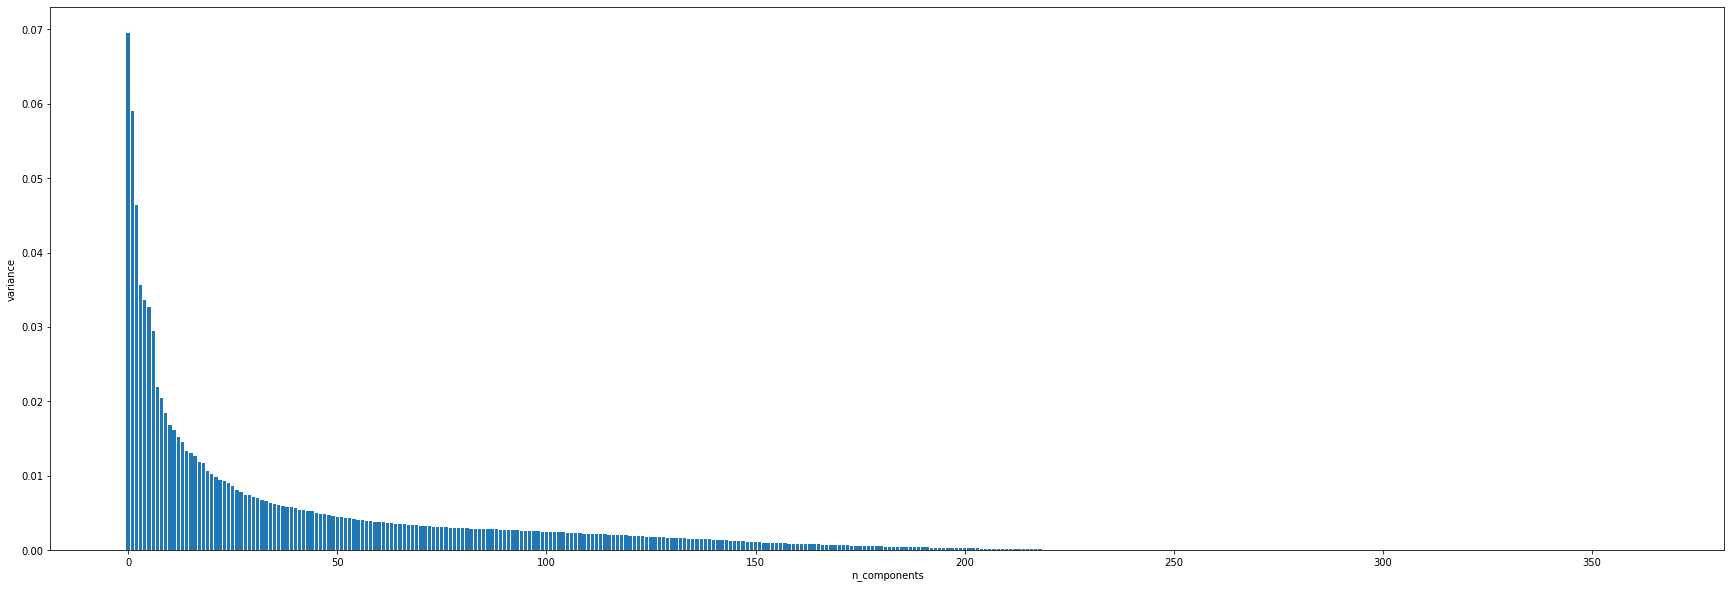

In [114]:
plt.figure(figsize=(30,10))
ind = np.arange(len(var_per))
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('variance')

In [115]:
len(cum_var_per[cum_var_per < 0.95]) # no of components explaining 95% variance.

140

In [116]:
n_comp=len(cum_var_per[cum_var_per <= 0.95])
print("Keeping 95% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca = sklearn_pca.fit_transform(X_std_train)
test_pca = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca.shape)

Keeping 95% Info with  140  components
Shape before PCA for Train:  (3156, 364)
Shape after PCA for Train:  (3156, 140)
Shape before PCA for Test:  (1053, 364)
Shape after PCA for Test:  (1053, 140)


In [181]:
X_test_pca.shape #shape after pca on test_data

(4203, 140)

#### -Fitting model

In [182]:
lin = LinearRegression()

In [183]:
lin.fit(train_pca,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [184]:
y_pred = lin.predict(test_pca)

In [185]:
print(sqrt(mean_squared_error(y_test, y_pred)))

8.327779519250036


In [186]:
print(r2_score(y_test, y_pred))

0.5474922143556574


In [187]:
lin.score(test_pca, y_test)

0.5474922143556574

In [188]:
lin.score(train_pca, y_train)

0.5642150773857831

In [189]:
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=80, learning_rate=0.08, gamma=1,  max_depth=5)

In [190]:
xgb.fit(train_pca,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.08, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=80, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [191]:
predictions = xgb.predict(test_pca)
xgb.score(test_pca, y_test)

0.5247916993508437

In [192]:
xgb.score(train_pca,y_train)

0.7848344977323294

In [193]:
print(r2_score(y_test, predictions))

0.5247916993508437
